Best Hyperparameter C: 10
Accuracy: 0.5539589021411122
F1 Score (macro): 0.4914474585633607

Classification Report:
               precision    recall  f1-score   support

       anger       0.52      0.46      0.49       836
     disgust       0.40      0.16      0.23       202
        fear       0.63      0.59      0.61      1104
         joy       0.60      0.67      0.63      2214
     neutral       0.49      0.64      0.56       481
     sadness       0.51      0.52      0.52      1327
       shame       0.80      0.35      0.48        23
    surprise       0.45      0.38      0.41       772

    accuracy                           0.55      6959
   macro avg       0.55      0.47      0.49      6959
weighted avg       0.55      0.55      0.55      6959



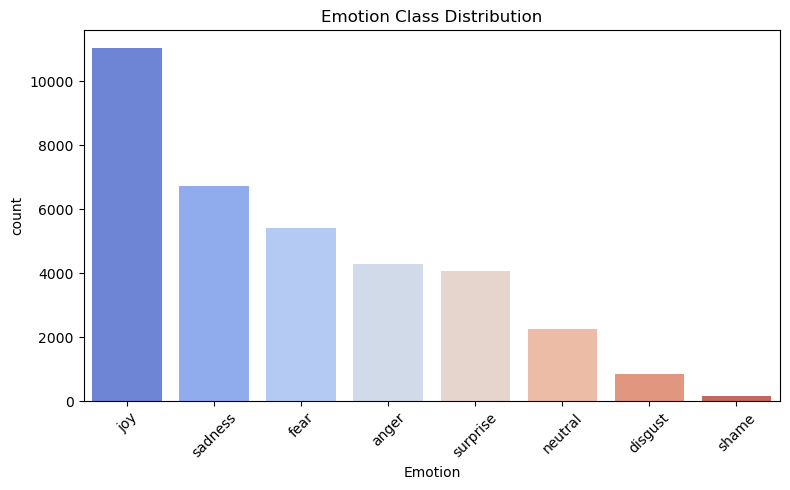

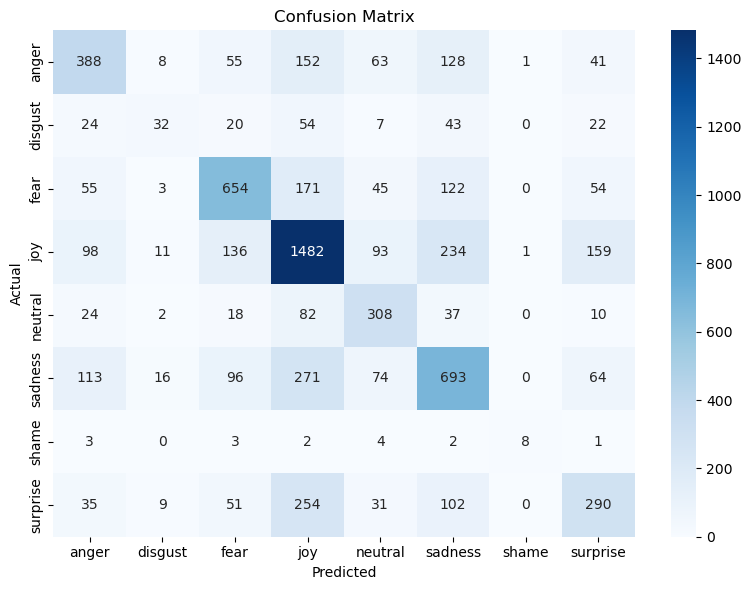


Sample 1:
Text: mom piece really depressing quotyou gay disgusting
Predicted Emotion: surprise

Sample 2:
Text: good family pictures whats upall kids grammy u know cant wait
Predicted Emotion: joy

Sample 3:
Text: protagonists unity may despondent loss edc european political community
Predicted Emotion: sadness

Sample 4:
Text: wewe nlikupea james morrison yes
Predicted Emotion: neutral

Sample 5:
Text: 
Predicted Emotion: neutral
Cross-Validation Accuracy: 55.27% (+/- 0.56)


In [5]:
# Advanced Emotion Detection using ML (with tuning and better vectorization)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

warnings.filterwarnings("ignore")

# --- STEP 1: Load Dataset ---
df_raw = pd.read_csv(r"C:\Users\ASUS\Downloads\CSV_file.csv")
df = df_raw[df_raw.columns[0]].str.split(",", n=3, expand=True)
df.columns = ['ID', 'Emotion', 'Text', 'Clean_Text']
df.dropna(inplace=True)

# --- STEP 2: Advanced Preprocessing ---
stop_words = set("""
a about above after again against all am an and any are aren't as at be because been before being below between both but by 
can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't 
have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into 
is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other ought our ours 
ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs 
them themselves then there there's these they they'd they'll they're they've this those through to too under until up very 
was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why's 
with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # URLs
    text = re.sub(r"@\w+|#\w+", '', text)  # Mentions & hashtags
    text = re.sub(r"[^\x00-\x7F]+", '', text)  # Emojis/Unicode
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Processed_Text'] = df['Text'].apply(clean_text)

# --- STEP 3: Train-Test Split ---
X = df['Processed_Text']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 4: TF-IDF with tuning ---
tfidf = TfidfVectorizer(max_features=8000, ngram_range=(1, 2), min_df=3, max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- STEP 5: Advanced Model: Logistic Regression with tuning ---
model = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

best_model = grid.best_estimator_

# --- STEP 6: Evaluate Model ---
y_pred = best_model.predict(X_test_tfidf)

print("Best Hyperparameter C:", grid.best_params_['C'])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- STEP 7: Visualization ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index, palette="coolwarm")
plt.title("Emotion Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- STEP 8: Save Model & Vectorizer ---
joblib.dump(best_model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# --- STEP 9: Predict Random 5 Samples ---
random_texts = X_test.sample(5, random_state=42)
random_texts_tfidf = tfidf.transform(random_texts)
predicted_emotions = best_model.predict(random_texts_tfidf)

for i, (text, emotion) in enumerate(zip(random_texts, predicted_emotions), 1):
    print(f"\nSample {i}:")
    print("Text:", text)
    print("Predicted Emotion:", emotion)

# --- STEP 10: Cross-Validation ---
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: %.2f%% (+/- %.2f)" % (cv_scores.mean()*100, cv_scores.std()*100))


# Written by : VINOTH KUMAR A 
# RIO-45: Automate detection of different emotions from textual comments and feedback
